In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
missing = {"PRECIP" : "Nulo","EVAP" : "Nulo","TMAX" : "Nulo","TMIN" : "Nulo"}
df0= pd.read_csv('bahiakino.txt',skiprows=0, sep='\s+', na_values='missing')

In [3]:
df=pd.DataFrame(df0)

In [4]:
#Conversion de la columna "Fecha" en una variable
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['FECHA'],1), dayfirst=True)

In [5]:
#Conversion de las columnas  "PRECIP", "EVAP", "TMAX", "TMIN" en variables numericas
cols = ['PRECIP', 'EVAP', 'TMAX', 'TMIN']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [6]:
#Creacion de variables de mes y año
df['MES'] = df['FECHA'].dt.month 
df['AÑO'] = df['FECHA'].dt.year
df['DIA'] = df['FECHA'].dt.day
df['TDIF'] = (df['TMAX'] - df['TMIN'])
df['TPROM'] = (df['TMAX'] + df['TMIN'])/2


In [7]:
df.head()

,FECHA,PRECIP,EVAP,TMAX,TMIN,MES,AÑO,DIA,TDIF,TPROM
0,1974-07-01,0.0,7.3,35.0,22.0,7,1974,1,13.0,28.50
1,1974-07-02,0.0,10.5,34.0,22.5,7,1974,2,11.5,28.25
2,1974-07-03,0.0,13.6,31.5,21.0,7,1974,3,10.5,26.25
3,1974-07-04,0.0,10.7,41.0,28.0,7,1974,4,13.0,34.50
4,1974-07-05,0.0,10.9,35.0,28.0,7,1974,5,7.0,31.50


In [8]:
# Número de años distintos
NumA = len(df['AÑO'].unique())
print(NumA, "años de datos")

24 años de datos


In [44]:
s=df['AÑO'][0]
r=df['AÑO'][len(df)-1]

En 1975 hay 1 dias helados
En 1976 hay 2 dias helados
En 1985 hay 2 dias helados
En 1990 hay 3 dias helados
En 2011 hay 2 dias helados


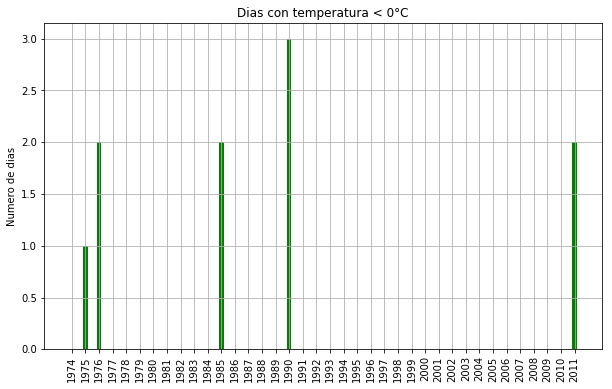

In [45]:
#1
FD = []
años = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["TMIN"][j] < 0):
            numD = numD+1
            #print("En",i,"hay",numD,"dias helados")
    FD.append(numD)
    años.append(i)
    if(numD>0):
        print("En",i,"hay",numD,"dias helados")
    numD = 0

width = np.min(np.diff(años))/3
X=np.arange(len(años))
plt.figure(figsize = (10, 6))
plt.bar(X-width,FD,width,color='g')
plt.title("Dias con temperatura < 0°C")
plt.ylabel("Numero de dias")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

En 1974 hay 132 dias de verano
En 1975 hay 228 dias de verano
En 1976 hay 245 dias de verano
En 1977 hay 227 dias de verano
En 1978 hay 141 dias de verano
En 1979 hay 58 dias de verano
En 1980 hay 212 dias de verano
En 1981 hay 212 dias de verano
En 1982 hay 191 dias de verano
En 1983 hay 178 dias de verano
En 1984 hay 195 dias de verano
En 1985 hay 194 dias de verano
En 1986 hay 119 dias de verano
En 1988 hay 153 dias de verano
En 1989 hay 84 dias de verano
En 1990 hay 164 dias de verano
En 1991 hay 175 dias de verano
En 1992 hay 203 dias de verano
En 1993 hay 205 dias de verano
En 2007 hay 185 dias de verano
En 2008 hay 125 dias de verano
En 2010 hay 49 dias de verano
En 2011 hay 86 dias de verano


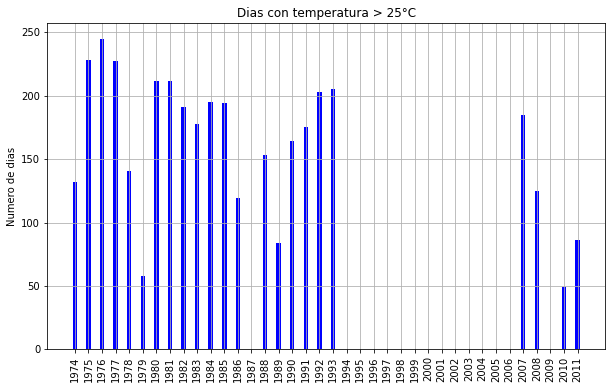

In [55]:
#2
SU = []
años2 = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["TMAX"][j] > 25):
            numD = numD+1
    SU.append(numD)
    años2.append(i)
    if(numD>0):
        print("En",i,"hay",numD,"dias de verano")
    numD = 0

width = np.min(np.diff(años))/3
X=np.arange(len(años2))
plt.figure(figsize = (10, 6))
plt.bar(X-width,SU,width,color='b')
plt.title("Dias con temperatura > 25°C")
plt.ylabel("Numero de dias")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

En 1974 hay 89 noches tropicales
En 1975 hay 80 noches tropicales
En 1976 hay 46 noches tropicales
En 1977 hay 100 noches tropicales
En 1978 hay 48 noches tropicales
En 1979 hay 23 noches tropicales
En 1980 hay 110 noches tropicales
En 1981 hay 82 noches tropicales
En 1982 hay 84 noches tropicales
En 1983 hay 60 noches tropicales
En 1984 hay 78 noches tropicales
En 1985 hay 81 noches tropicales
En 1986 hay 40 noches tropicales
En 1988 hay 77 noches tropicales
En 1989 hay 1 noches tropicales
En 1990 hay 74 noches tropicales
En 1991 hay 85 noches tropicales
En 1992 hay 80 noches tropicales
En 1993 hay 85 noches tropicales
En 2007 hay 107 noches tropicales
En 2008 hay 80 noches tropicales
En 2010 hay 30 noches tropicales
En 2011 hay 35 noches tropicales


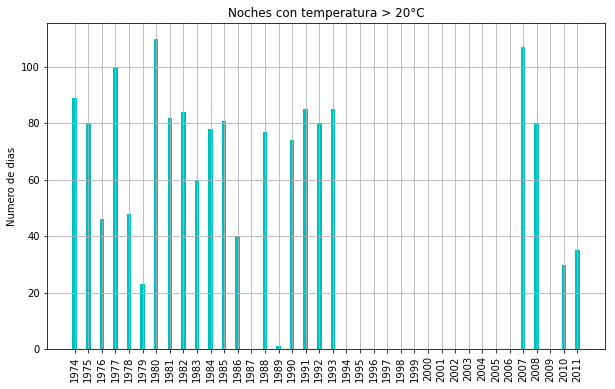

In [56]:
#3
TR = []
años3 = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["TMIN"][j] > 20):
            numD = numD+1
    TR.append(numD)
    años3.append(i)
    if(numD>0):
        print("En",i,"hay",numD,"noches tropicales")
    numD = 0

width = np.min(np.diff(años))/3
X=np.arange(len(años3))
plt.figure(figsize = (10, 6))
plt.bar(X-width,TR,width,color='c')
plt.title("Noches con temperatura > 20°C")
plt.ylabel("Numero de dias")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

In [25]:
ftday = []
numD = -1
for i in range(s,r+1):
    for j in range(5,len(df)):
            if(df["AÑO"][i-5] == j):
                if(df["TPROM"][j-5] > 5 and df["TPROM"][j-4] > 5 and df["TPROM"][j-3] > 5 and
                   df["TPROM"][j-2] > 5 and df["TPROM"][j-1] > 5 and df["TPROM"][j]   > 5):
                    numD = i
                    break
    if(numD != -1):
        ftday.append(numD)
        numD= -1
    else:
        ftday.append("NA")
        
ltday = []
numD2 = -1
for i in range(r,s-1,-1):
    for j in range(len(df),5,-1):
            if(df["AÑO"][i-5] == j):
                if(df["TPROM"][j-5] > 5 and df["TPROM"][j-4] > 5 and df["TPROM"][j-3] > 5 and
                   df["TPROM"][j-2] > 5 and df["TPROM"][j-1] > 5 and df["TPROM"][j]   > 5):
                    numD2 = i
                    break
    if(numD != -1):
        ltday.append(numD2)
        numD2= -1
    else:
        ltday.append("NA")

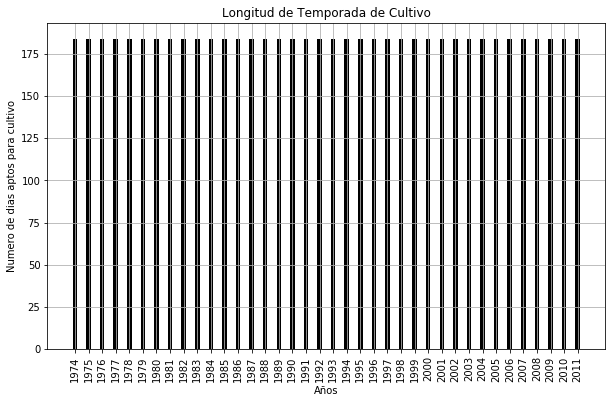

In [59]:
GSL = []
for i in range(0,len(ltday)):
    if(ltday[i]!="NA" and ftday[i]!="NA"):
        GSL.append(ltday[i]-ftday[i])
    if(ltday[i]=='NA'):
            GSL.append( len(df[df['AÑO'] == s].index) )
    else:
        if(ftday[i]=='NA'):
            GSL.append(0)
GSL
width = np.min(np.diff(años))/3
X=np.arange(len(GSL))
plt.figure(figsize = (10, 6))
plt.bar(X-width,GSL,width,color='k')
plt.title("Longitud de Temporada de Cultivo")
plt.ylabel("Numero de dias aptos para cultivo")
plt.xlabel("Años")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

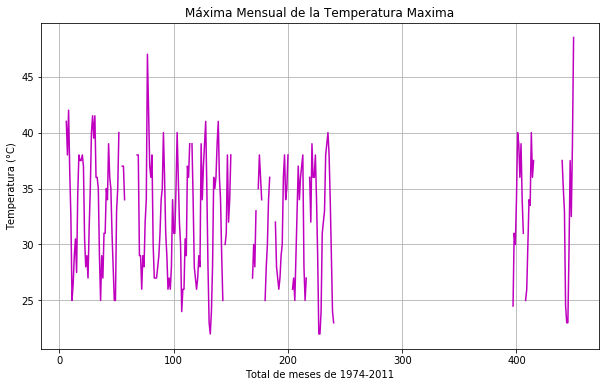

In [60]:
#5
TXx = []
for k in range(s,r+1):
    df_Año = df[df["AÑO"]==k]
    for i in range(1,13):
        df_Mes = df_Año[df_Año["MES"]==i]
        maxmens = df_Mes.TMAX.max()
        TXx.append(maxmens)

plt.figure(figsize = (10, 6))
plt.plot(range(0,len(TXx)),TXx,color='m')
plt.title("Máxima Mensual de la Temperatura Maxima")
plt.ylabel("Temperatura (°C)")
plt.xlabel("Total de meses de 1974-2011")
plt.grid()
plt.show()

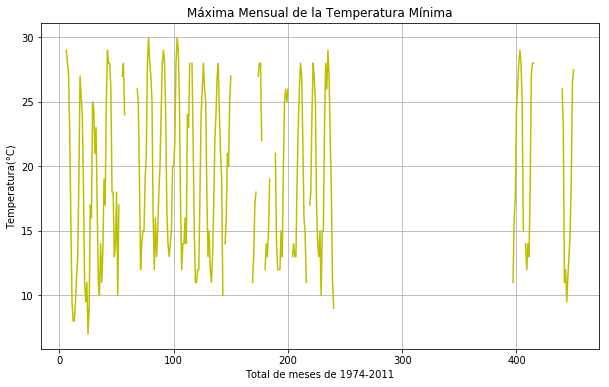

In [61]:
#6
TNx = []
minmens=0
for k in range(s,r+1):
    df_Año = df[df["AÑO"]==k]
    for i in range(1,13):
        df_Mes = df_Año[df_Año["MES"]==i]
        minmens = df_Mes.TMIN.max()
        TNx.append(minmens)

plt.figure(figsize = (10, 6))
plt.plot(range(0,len(TNx)),TNx,color='y')
plt.title("Máxima Mensual de la Temperatura Mínima")
plt.ylabel("Temperatura(°C)")
plt.xlabel("Total de meses de 1974-2011")
plt.grid()
plt.show()

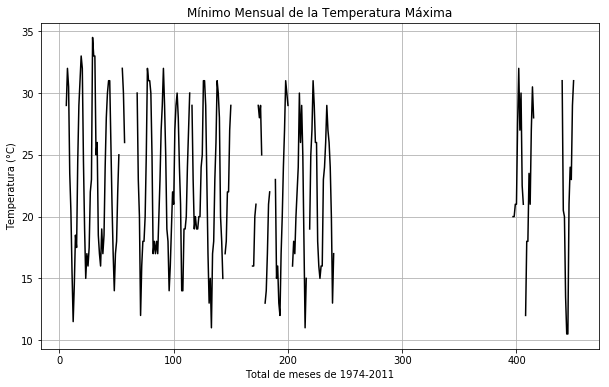

In [86]:
#7
TXn = []
for k in range(s,r+1):
    df_Año = df[df["AÑO"]==k]
    for i in range(1,13):
        df_Mes = df_Año[df_Año["MES"]==i]
        minmaxmens = df_Mes.TMAX.min()
        TXn.append(minmaxmens)


plt.figure(figsize = (10, 6))
plt.plot(range(0,len(TXn)),TXn,color='k')
plt.title("Mínimo Mensual de la Temperatura Máxima")
plt.ylabel("Temperatura (°C)")
plt.xlabel("Total de meses de 1974-2011")
plt.grid()
plt.show()

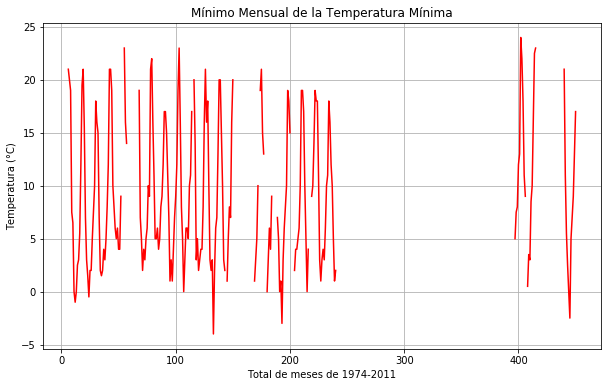

In [39]:
#8
TNn = []
for k in range(s,r+1):
    df_Año = df[df["AÑO"]==k]
    for i in range(1,13):
        df_Mes = df_Año[df_Año["MES"]==i]
        minminmens = df_Mes.TMIN.min()
        TNn.append(minminmens)


plt.figure(figsize = (10, 6))
plt.plot(range(0,len(TNn)),TNn,color='R')
plt.title("Mínimo Mensual de la Temperatura Mínima")
plt.ylabel("Temperatura (°C)")
plt.xlabel("Total de meses de 1974-2011")
plt.grid()
plt.show()

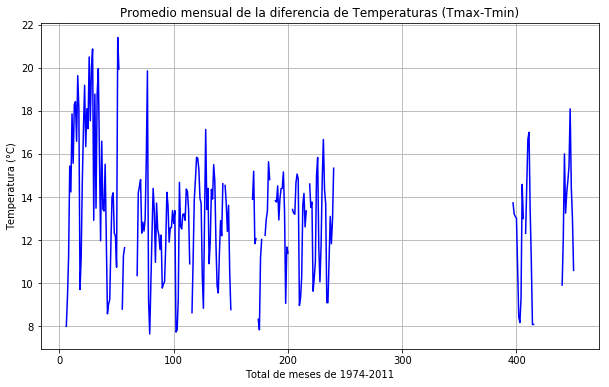

In [65]:
#9
DTR = []
for k in range(s,r+1):
    df_Año = df[df["AÑO"]==k]
    for i in range(1,13):
        df_Mes = df_Año[df_Año["MES"]==i]
        prom = df_Mes.TDIF.mean()
        DTR.append(prom)
        
plt.figure(figsize = (10, 6))
plt.plot(range(0,len(DTR)),DTR,color='b')
plt.title("Promedio mensual de la diferencia de Temperaturas (Tmax-Tmin)")
plt.ylabel("Temperatura (°C)")
plt.xlabel("Total de meses de 1974-2011")
plt.grid()
plt.show()

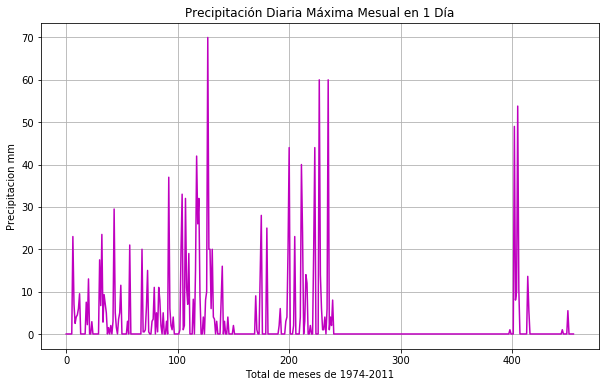

In [88]:
#10
Rx1day=[]
for k in range(s,r+1):
    df_Año = df[df["AÑO"]==k]
    for i in range(1,13):
        df_Mes = df_Año[df_Año["MES"]==i]
        if(df_Mes['PRECIP'].mean()!=0 and df_Mes['PRECIP'].count()!=0):
            Rmaxid = df_Mes['PRECIP'].idxmax()
            Rmax = df_Mes['PRECIP'][Rmaxid]
            Rx1day.append(Rmax)
        else:  
            Rx1day.append(0.0)
            
plt.figure(figsize = (10, 6))
plt.plot(range(0,len(Rx1day)),Rx1day,color='m')
plt.title("Precipitación Diaria Máxima Mesual en 1 Día")
plt.ylabel("Precipitacion mm")
plt.xlabel("Total de meses de 1974-2011")
plt.grid()
plt.show()

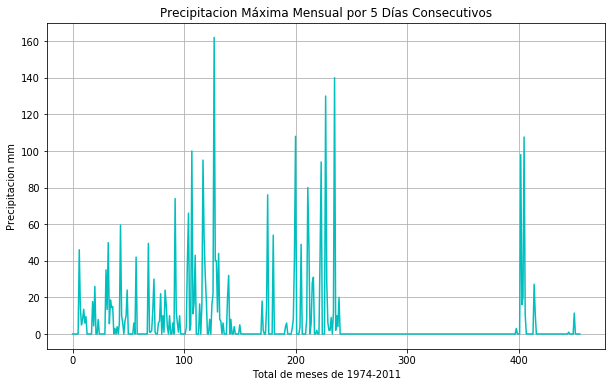

In [87]:
#11
Rx5day=[]
safo=-1000
for k in range(s,r+1):
    df_Año = df[df["AÑO"]==k]
    for i in range(1,13):
        df_Mes = df_Año[df_Año["MES"]==i]
        df_Mes = df_Mes.reset_index()
        if(df_Mes['PRECIP'].mean()!=0 and df_Mes['PRECIP'].count()!=0):
            for j in range (4,len(df_Mes)):
                lluvia =(df_Mes['PRECIP'][j-4]+df_Mes['PRECIP'][j-3]+
                         df_Mes['PRECIP'][j-3]+df_Mes['PRECIP'][j-2]+
                         df_Mes['PRECIP'][j])
                if (lluvia>safo):
                         safo=lluvia
            Rx5day.append(safo)
            safo=-1000
            #print(Rx5day)
        else:  
            Rx5day.append(0.0)
            
plt.figure(figsize = (10, 6))
plt.plot(range(0,len(Rx5day)),Rx5day,color='c')
plt.title("Precipitacion Máxima Mensual por 5 Días Consecutivos")
plt.ylabel("Precipitacion mm")
plt.xlabel("Total de meses de 1974-2011")
plt.grid()
plt.show()

En 1974 hay 1 dias con precipitaciones de 1 mm
En 1975 hay 2 dias con precipitaciones de 1 mm
En 1976 hay 1 dias con precipitaciones de 1 mm
En 1977 hay 2 dias con precipitaciones de 1 mm
En 1978 hay 2 dias con precipitaciones de 1 mm
En 1979 hay 3 dias con precipitaciones de 1 mm
En 1980 hay 2 dias con precipitaciones de 1 mm
En 1981 hay 4 dias con precipitaciones de 1 mm
En 1982 hay 5 dias con precipitaciones de 1 mm
En 1983 hay 1 dias con precipitaciones de 1 mm
En 1984 hay 5 dias con precipitaciones de 1 mm
En 1986 hay 3 dias con precipitaciones de 1 mm
En 1988 hay 1 dias con precipitaciones de 1 mm
En 1990 hay 2 dias con precipitaciones de 1 mm
En 1991 hay 3 dias con precipitaciones de 1 mm
En 1992 hay 3 dias con precipitaciones de 1 mm
En 1993 hay 5 dias con precipitaciones de 1 mm
En 2007 hay 2 dias con precipitaciones de 1 mm
En 2011 hay 2 dias con precipitaciones de 1 mm


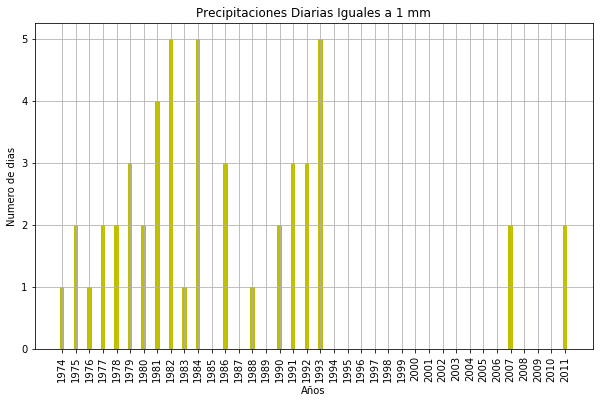

In [75]:
#12
SDII = []
años12 = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["PRECIP"][j] == 1 ):
            numD = numD+1
    SDII.append(numD)
    años12.append(i)
    if(numD>0):
        print("En",i,"hay",numD,"dias con precipitaciones de 1 mm")
    numD = 0

width = np.min(np.diff(años12))/3
X=np.arange(len(años12))
plt.figure(figsize = (10, 6))
plt.bar(X-width,SDII,width,color='y')
plt.title("Precipitaciones Diarias Iguales a 1 mm")
plt.ylabel("Numero de dias")
plt.xlabel("Años")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

En 1974 hay 2 dias con precipitaciones mayores a 10 mm
En 1975 hay 1 dias con precipitaciones mayores a 10 mm
En 1976 hay 3 dias con precipitaciones mayores a 10 mm
En 1977 hay 2 dias con precipitaciones mayores a 10 mm
En 1978 hay 2 dias con precipitaciones mayores a 10 mm
En 1979 hay 1 dias con precipitaciones mayores a 10 mm
En 1980 hay 3 dias con precipitaciones mayores a 10 mm
En 1981 hay 2 dias con precipitaciones mayores a 10 mm
En 1982 hay 4 dias con precipitaciones mayores a 10 mm
En 1983 hay 6 dias con precipitaciones mayores a 10 mm
En 1984 hay 6 dias con precipitaciones mayores a 10 mm
En 1985 hay 1 dias con precipitaciones mayores a 10 mm
En 1988 hay 3 dias con precipitaciones mayores a 10 mm
En 1989 hay 1 dias con precipitaciones mayores a 10 mm
En 1990 hay 5 dias con precipitaciones mayores a 10 mm
En 1991 hay 5 dias con precipitaciones mayores a 10 mm
En 1992 hay 9 dias con precipitaciones mayores a 10 mm
En 1993 hay 3 dias con precipitaciones mayores a 10 mm
En 2007 ha

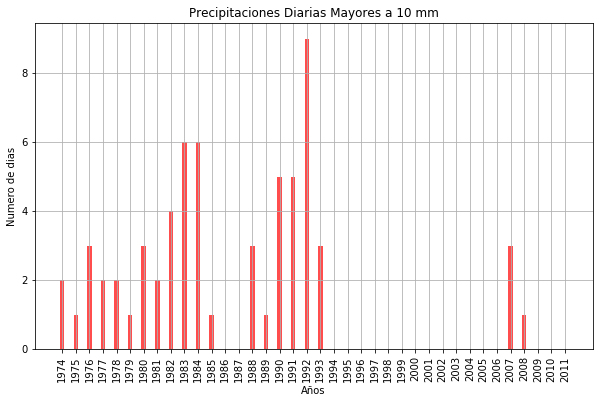

In [79]:
#13
R10mm = []
años13 = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["PRECIP"][j] > 10 ):
            numD = numD+1
    R10mm.append(numD)
    años13.append(i)
    if(numD>0):
        print("En",i,"hay",numD,"dias con precipitaciones mayores a 10 mm")
    numD = 0

width = np.min(np.diff(años13))/3
X=np.arange(len(años13))
plt.figure(figsize = (10, 6))
plt.bar(X-width,R10mm,width,alpha=0.7,color='R')
plt.title("Precipitaciones Diarias Mayores a 10 mm")
plt.ylabel("Numero de dias")
plt.xlabel("Años")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

En 1974 hay 1 dias con precipitaciones mayores a 20 mm
En 1976 hay 1 dias con precipitaciones mayores a 20 mm
En 1977 hay 2 dias con precipitaciones mayores a 20 mm
En 1978 hay 1 dias con precipitaciones mayores a 20 mm
En 1981 hay 1 dias con precipitaciones mayores a 20 mm
En 1982 hay 3 dias con precipitaciones mayores a 20 mm
En 1983 hay 3 dias con precipitaciones mayores a 20 mm
En 1984 hay 2 dias con precipitaciones mayores a 20 mm
En 1988 hay 1 dias con precipitaciones mayores a 20 mm
En 1989 hay 1 dias con precipitaciones mayores a 20 mm
En 1990 hay 1 dias con precipitaciones mayores a 20 mm
En 1991 hay 3 dias con precipitaciones mayores a 20 mm
En 1992 hay 4 dias con precipitaciones mayores a 20 mm
En 1993 hay 1 dias con precipitaciones mayores a 20 mm
En 2007 hay 2 dias con precipitaciones mayores a 20 mm


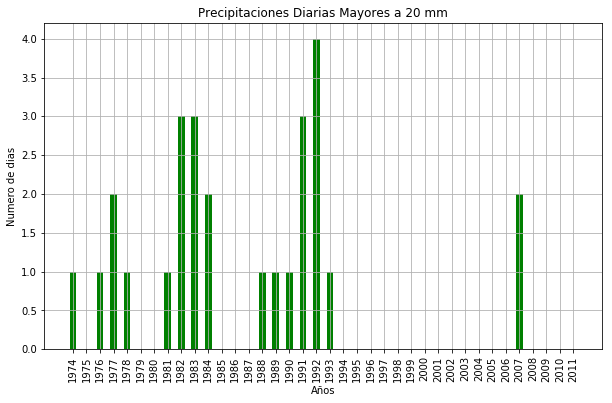

In [85]:
#14
R20mm = []
años14 = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["PRECIP"][j] > 20 ):
            numD = numD+1
    R20mm.append(numD)
    años14.append(i)
    if(numD>0):
        print("En",i,"hay",numD,"dias con precipitaciones mayores a 20 mm")
    numD = 0

width = np.min(np.diff(años14))/2
X=np.arange(len(años14))
plt.figure(figsize = (10, 6))
plt.bar(X-width,R20mm,width,color='g')
plt.title("Precipitaciones Diarias Mayores a 20 mm")
plt.ylabel("Numero de dias")
plt.xlabel("Años")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

En 1974 hay un máximo de 38 dias secos consecutivos
En 1975 hay un máximo de 157 dias secos consecutivos
En 1976 hay un máximo de 190 dias secos consecutivos
En 1977 hay un máximo de 81 dias secos consecutivos
En 1978 hay un máximo de 114 dias secos consecutivos
En 1979 hay un máximo de 81 dias secos consecutivos
En 1980 hay un máximo de 132 dias secos consecutivos
En 1981 hay un máximo de 74 dias secos consecutivos
En 1982 hay un máximo de 174 dias secos consecutivos
En 1983 hay un máximo de 124 dias secos consecutivos
En 1984 hay un máximo de 74 dias secos consecutivos
En 1985 hay un máximo de 113 dias secos consecutivos
En 1986 hay un máximo de 148 dias secos consecutivos
En 1988 hay un máximo de 64 dias secos consecutivos
En 1989 hay un máximo de 192 dias secos consecutivos
En 1990 hay un máximo de 147 dias secos consecutivos
En 1991 hay un máximo de 125 dias secos consecutivos
En 1992 hay un máximo de 96 dias secos consecutivos
En 1993 hay un máximo de 49 dias secos consecutivos
E

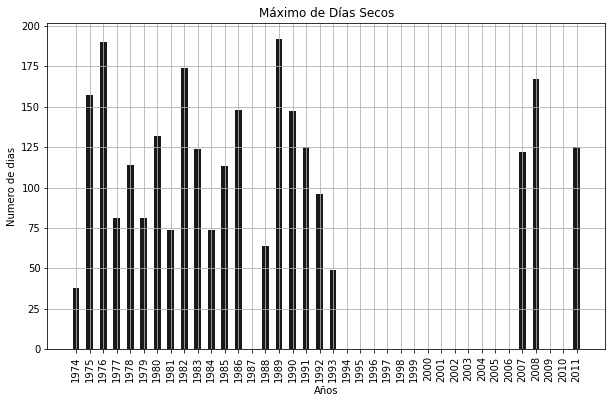

In [81]:
#15
CDD = []
años15 = []
numD = 0
safe = 0
for i in range(s,r+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i):
            if (df["PRECIP"][j] < 1):
                safe = safe+1
            elif (df['PRECIP'][j] >= 1):
                if(safe>numD):
                    numD=safe
                    safe=0
                else:
                    safe=0
                    
    CDD.append(numD)
    años15.append(i)
    if(numD>0):
        print("En",i,"hay un máximo de",numD,"dias secos consecutivos")
    numD = 0
    safe=0

width = np.min(np.diff(años15))/2
X=np.arange(len(años15))
plt.figure(figsize = (10, 6))
plt.bar(X-width,CDD,width,alpha=0.9,color='k')
plt.title("Máximo de Días Secos")
plt.ylabel("Numero de dias")
plt.xlabel("Años")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

En 1974 hay un máximo de 2 dias lluviosos consecutivos
En 1975 hay un máximo de 4 dias lluviosos consecutivos
En 1976 hay un máximo de 3 dias lluviosos consecutivos
En 1977 hay un máximo de 3 dias lluviosos consecutivos
En 1978 hay un máximo de 2 dias lluviosos consecutivos
En 1979 hay un máximo de 3 dias lluviosos consecutivos
En 1980 hay un máximo de 2 dias lluviosos consecutivos
En 1981 hay un máximo de 3 dias lluviosos consecutivos
En 1982 hay un máximo de 3 dias lluviosos consecutivos
En 1983 hay un máximo de 6 dias lluviosos consecutivos
En 1984 hay un máximo de 2 dias lluviosos consecutivos
En 1985 hay un máximo de 2 dias lluviosos consecutivos
En 1986 hay un máximo de 2 dias lluviosos consecutivos
En 1988 hay un máximo de 2 dias lluviosos consecutivos
En 1989 hay un máximo de 2 dias lluviosos consecutivos
En 1990 hay un máximo de 4 dias lluviosos consecutivos
En 1991 hay un máximo de 3 dias lluviosos consecutivos
En 1992 hay un máximo de 3 dias lluviosos consecutivos
En 1993 ha

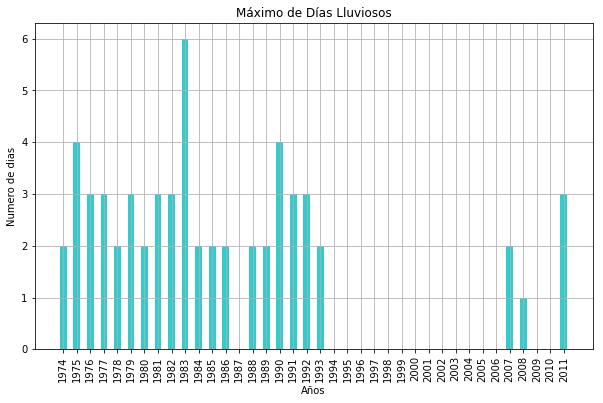

In [80]:
#16
CWD = []
años16 = []
numD = 0
safe = 0
for i in range(s,r+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i):
            if (df["PRECIP"][j] >= 1):
                safe = safe+1
            elif (df['PRECIP'][j] < 1):
                if(safe>numD):
                    numD=safe
                    safe=0
                else:
                    safe=0
                    
    CWD.append(numD)
    años16.append(i)
    if(numD>0):
        print("En",i,"hay un máximo de",numD,"dias lluviosos consecutivos")
    numD = 0
    safe=0

width = np.min(np.diff(años16))/2
X=np.arange(len(años16))
plt.figure(figsize = (10, 6))
plt.bar(X-width,CWD,width,alpha=0.8,color='c')
plt.title("Máximo de Días Lluviosos")
plt.ylabel("Numero de dias")
plt.xlabel("Años")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()